# Визуализация траектории движения мышки

Импортируем pandas и numpy для работы с полученным датафреймом

In [2]:
import pandas as pd
import numpy as np

Беря во внимание тот факт, что мы используем zip сжатие читаем сохраненный датафрейм. <br>
Проверим, что данные загрузились корректно.

In [14]:
df = pd.read_pickle('./backend/20181031110838_Sanya.pkl', compression='zip')
df.iloc[:5]

,x,y
0,488,290
1,488,291
2,488,292
3,488,294
4,488,296


Импортируем mathplotlib для работы с графической частью. 

In [11]:
import matplotlib
import matplotlib.pyplot as plt

Установим граничные условия для осей X и Y. <br>
**ВАЖНО**: так как в исходном датафрейме данные считывались из браузера при помощи JS, то надо помнить, что начало
координат смещено в левый верхний угол! <br>
Изменим соответствующим образом базовую систему координат pyplot

<IPython.core.display.Javascript object>


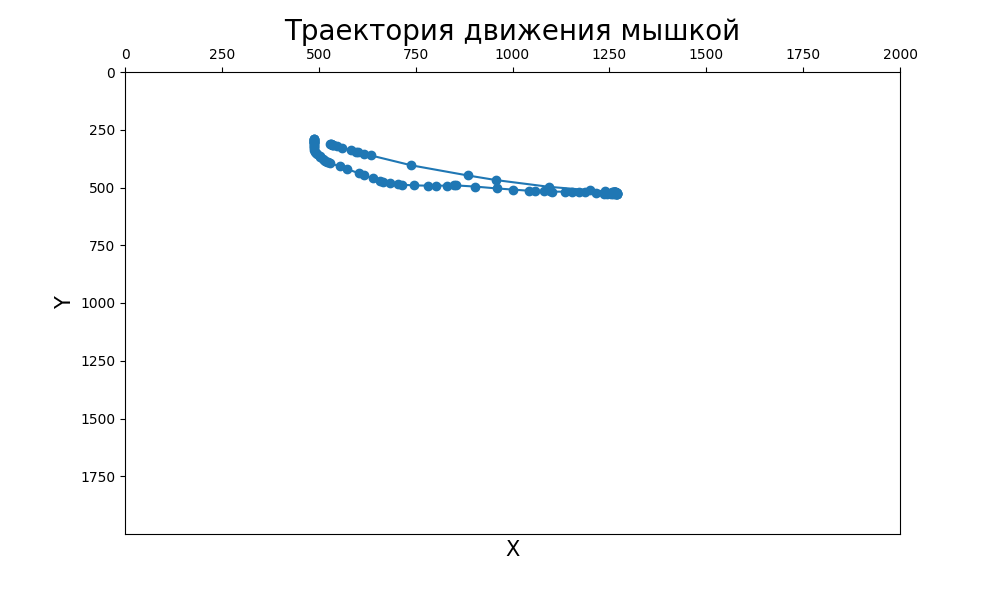

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(10,6))

# Устанавливаем ограничения
plt.xlim(0, 2000)
plt.ylim(0, 2000)

axis = plt.gca()                              # получаем инстанс текущих осей
axis.set_ylim(axis.get_ylim()[::-1])          # инвертируем установленное на ось y ограничение
axis.xaxis.tick_top()                         # перемещаем ось x вверх  
axis.yaxis.set_ticks(np.arange(0, 2000, 250)) # устанавливаем отображаемые интервалы
axis.yaxis.tick_left()                        # перемещаем ось y влево   

# Добавим обозначения осей и название рисунка
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.title('Траектория движения мышкой',fontsize=20)


# Построим статическое изображение полученной траектории
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y'])
plt.show()


Помимо этого, мы можем анимировать построение траектории <br>
**ВНИМАНИЕ**: это может достаточно сильно нагрузить CPU

<IPython.core.display.Javascript object>


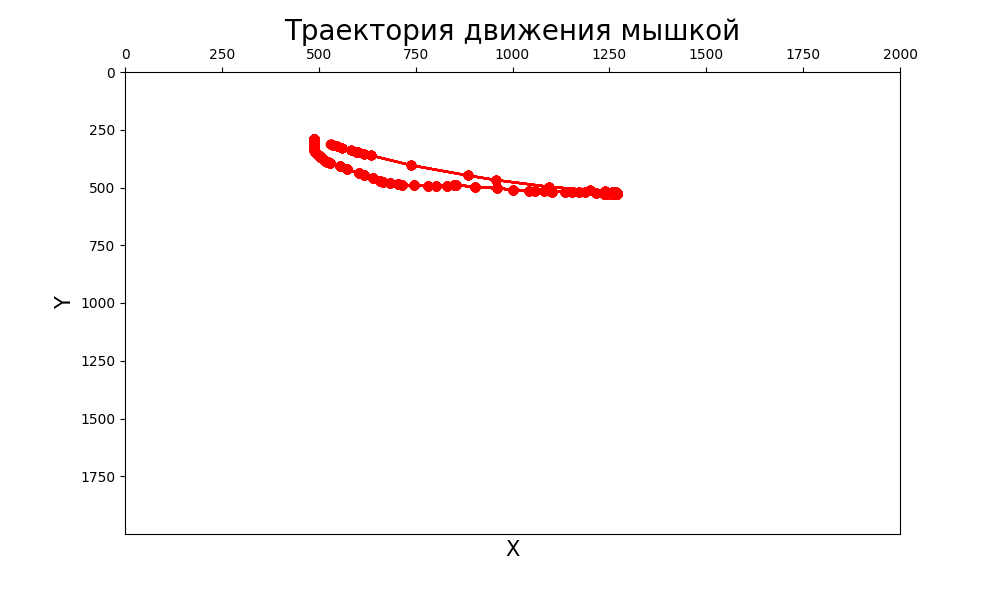

In [16]:
%matplotlib notebook
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,6))

# Устанавливаем ограничения
plt.xlim(0, 2000)
plt.ylim(0, 2000)

axis = plt.gca()                              # получаем инстанс текущих осей
axis.set_ylim(axis.get_ylim()[::-1])          # инвертируем установленное на ось y ограничение
axis.xaxis.tick_top()                         # перемещаем ось x вверх  
axis.yaxis.set_ticks(np.arange(0, 2000, 250)) # устанавливаем отображаемые интервалы
axis.yaxis.tick_left()                        # перемещаем ось y влево   

# Добавим обозначения осей и название рисунка
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.title('Траектория движения мышкой',fontsize=20)

def animate(i):
    data = df.iloc[:int(i+1)] #select data range
    plt.scatter(data['x'], data['y'], color='r')
    plt.plot(data['x'], data['y'], color='r')
    
ani = animation.FuncAnimation(fig, animate, frames=df.iloc[:]['x'].size, repeat=False)


## Вывод
На полученной визуализации видно, что те места, в которых пользователь останавливал курсор мыши, содержат большое скопление точек.
Длинные отрезки между точками свидетельствуют о резких перемещениях курсора мыши.